# Getting data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import warnings
from ML_utils import *
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('processminer-rare-event-mts.xlsx')

In [4]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [5]:
df['y'].value_counts()

0    18274
1      124
Name: y, dtype: int64

In [6]:
df.isna().any().value_counts()

False    63
dtype: int64

In [18]:
#Separating df's for features and target
dtrainx=df.drop(['time','y'],axis=1)
dtrainy=df['y']
#preparing data for CV
X=df.drop(['time','y'],axis=1).values
y=df['y'].values


In [8]:
#Pipeline com normalizacao e classificador 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree

pip = Pipeline([('std',StandardScaler()),('clf',tree.DecisionTreeClassifier())])

# CV with several classifiers

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())


In [10]:
#Doing CV for all clasiifiers in the above
cv=Cross_valid_clf(X,y,n_splits=5)
for classifier in clfs:
    print("-"*100)
    print(str(classifier))
    pip.set_params(clf = classifier)
    cv.score(pip)

----------------------------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
------------------------------

Fold 1 out of 5
Accuracy_score: 0.8190217391304347
------------------------------

Fold 2 out of 5
Accuracy_score: 0.9942934782608696
------------------------------

Fold 3 out of 5
Accuracy_score: 0.8692934782608696
------------------------------

Fold 4 out of 5
Accuracy_score: 0.9051630434782608
------------------------------

Fold 5 out of 5
Accuracy_score: 0.967373572593801

 Overall Score:
Accuracy_score Mean: 0.911029062344847   Std: 0.06379542847929794
----------------------------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weig

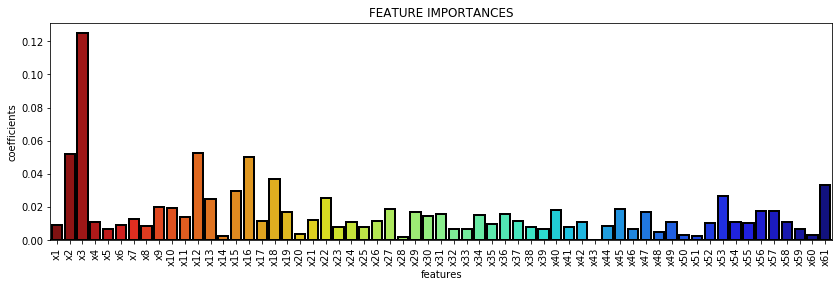

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dtrainx,dtrainy,test_size=0.20,random_state=0)
feature_importance_plot(algorithm=RandomForestClassifier(),X_train=x_train,y_train=y_train,of_type="feat")